# EE 380L: Data Mining
## Assignment 4

Due: Mar 28 at 11:59 pm  
Total points: 50

You may work in pairs. Only one student per pair needs to submit the assignment on Canvas, but you should include names and UTEIDs for both students.

# Question 1: Decision Tree using Python (7 pts)
In this problem, you will model the data using decision trees to perform a classification task. Load the BreastTissue.csv dataset in the Q1 folder. The dataset has been preprocessed. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue). Using the class tree.DecisionTreeClassifier (http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree), build two different trees with a maximum depth of two using the split criteria (i) Gini and (ii) Entropy. Use entire data to build trees. Plot the two trees. If your classifier object is called clf, use the following commands to save the generated tree as a '.dot' file that can be used to visualize the tree using Webgraphviz: http://www.webgraphviz.com/

Hint: see  http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [168]:
# q1

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.externals.six import StringIO

df = pd.read_csv('Q1/BreastTissue.csv')
X_train = df.iloc[:,2:]
y_train = df.iloc[:,1]

# gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
clf_gini.fit(X_train, y_train)

#entropy
clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
clf_ent.fit(X_train, y_train)

with open("decision_tree_gini.dot", 'w') as f1:
    f1 = tree.export_graphviz(clf_gini, out_file=f1)

with open("decision_tree_entropy.dot", 'w') as f2:
    f2 = tree.export_graphviz(clf_ent, out_file=f2)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Copy paste the contents of your '.dot' file into the text window on the website to visualize the trees. At which node(s) do they differ?

decision_tree_gini


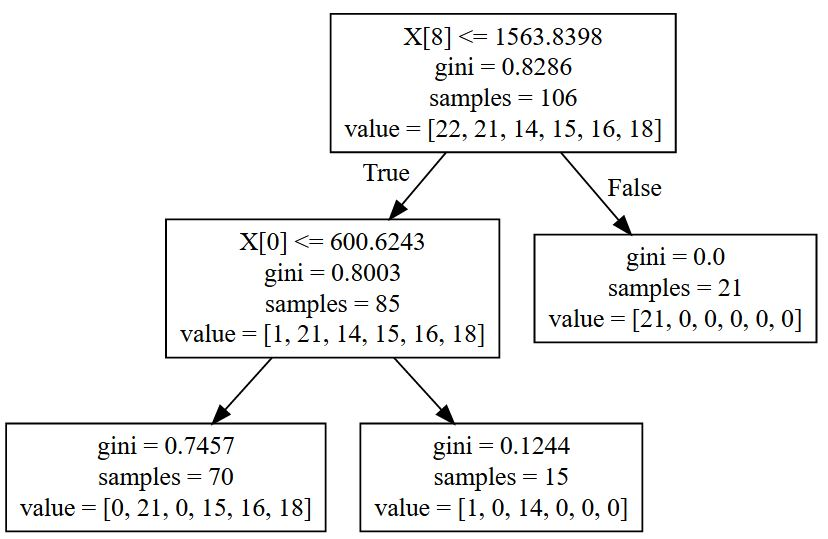

decision_tree_entropy


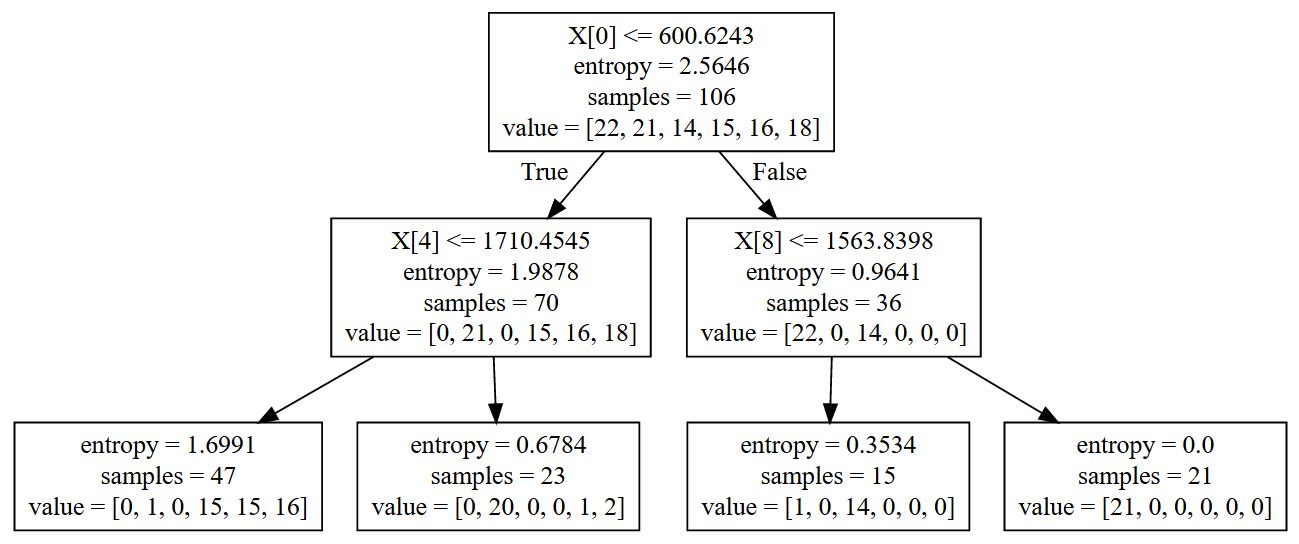

From the first decision node, gini and entropy trees are different; furthermore, entropy tree has finer classification rule, e.g. X[0], X[4], X[8].


In [160]:
# comparison

from IPython.display import Image
print "decision_tree_gini"
Image(filename='decision_tree_gini.jpg')
print "decision_tree_entropy"
Image(filename='decision_tree_entropy.jpg')

print "From the first decision node, gini and entropy trees are different; furthermore, entropy tree has finer classification rule, e.g. X[0], X[4], X[8]."

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

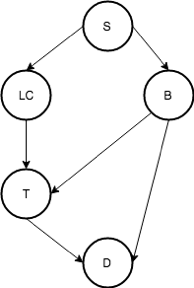

In [7]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

Q2 Answer:

(a)  
$Pr(B = yes)$
$= Pr( B = yes | S = yes)*Pr( S = yes) + Pr( B = yes | S = no)*Pr( S = no ) = 0.06*0.1 + 0.02*0.9 = 0.024$

$Pr(LC = yes) $
$= Pr( LC = yes | S = yes)*Pr( S = yes ) + Pr ( LC = yes | S = no)*Pr( S = no ) = 0.03*0.1 + 0.01*0.9 = 0.012$

$Pr(T = yes)$ 
$= Pr( T = yes | LC = yes, B = yes )*Pr( LC = yes )*Pr( B = yes) +  Pr( T = yes | LC = yes, B = no )*Pr( LC = yes )*Pr( B = no) + Pr( T = yes | LC = no, B = yes )*Pr( LC = no )*Pr( B = yes) + Pr( T = yes | LC = no, B = no )*Pr( LC = no )*Pr( B = no)$ 
$= 0.8*0.012*0.024 + 0.5*0.012*0.976 + 0.1*0.988*0.024 + 0.04*0.988*0.976 = 0.0491$
    
$Pr(D = yes ) = Pr(D = yes | T = yes, B = yes)*Pr(T  = yes)*Pr(B = yes) + Pr(D = yes | T = yes, B = no)*Pr(T  = yes)*Pr(B = no) + Pr(D = yes | T = no, B = yes)*Pr(T  = no)*Pr(B = yes) + Pr(D = yes | T = no, B = no)*Pr(T  = no)*Pr(B = no)   $ 
$= 0.9*0.0491*0.024 + 0.7*0.0491*0.976 + 0.65*0.9509*0.024 + 0.015*0.9509*0.976 = 0.063361 $

(b)  
$Pr(LC = no, B = yes, D = yes) = Pr(D = yes | B = yes, LC = no)*Pr(B = yes)*Pr(LC = no)$
  
  Because  $Pr(T = yes | LC = no, B = yes) = 0.1 $, we can derive $Pr(D = yes | B = yes, LC = no) = Pr(D = yes | T = yes, LC = no, B = yes) + Pr(D = yes | T = no, LC = no, B = yes) = 0.1*0.9 + 0.9*0.65 = 0.675$

Therefore,  $Pr(LC = no, B = yes, D = yes) = 0.675*0.024*0.988 = 0.0160056 $

(c) 
According to (b), we can find $Pr(D =yes | B= yes, LC = no) = 0.675 $

(d)  
$Pr(T =yes | S = yes) =$
$Pr( T = yes | LC = yes, B = yes)*Pr( LC = yes | S = yes)*Pr( B = yes | S = yes) $
$+Pr( T = yes | LC = yes, B = no)*Pr( LC = yes | S = yes)*Pr( B = no | S = yes) $
$+Pr( T = yes | LC = no, B = yes)*Pr( LC = no | S = yes)*Pr( B = yes | S = yes)  $
$+Pr( T = yes | LC = no, B = no)*Pr( LC = no | S = yes)*Pr( B = no | S = yes) $
$=0.8*0.03*0.06+0.5*0.03*0.94+0.1*0.97*0.06+0.04*0.97*0.94=0.057832$

# Question 3: Logistic Regression (10 pts)
In this question, we will explore the use of Logistic Regression. We use MAGIC Gamma Telescope Data Set. The dataset can be found at https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope. It has 19020 instances with 11 attributes. The task is to classify the instance as signal (target = 1, positive) or background (target = 0, negative).
The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance.

(a) (6 pts) Fit a ridge logistic regression (i.e., logistic regression with a ridge penalty) model using scikit learn package. Use 10-fold cross-validation to choose the strength of the regularization ('C' parameter). Maintain all other parameters as default. Report the mean error rate (fraction of incorrect labels) on both the training and test sets.

(b) (4 pts) Plot the receiver operating characteristic (ROC) curve on the test data. Report the area under the ROC curve (AUC).

Hint: see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html  and 

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

In [1]:
# q3
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize

df_train = pd.read_csv('Q3&Q4/magic_train.csv', header=None)
df_train.columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df_test = pd.read_csv('Q3&Q4/magic_test.csv', header=None)
df_test.columns = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

X_train = df_train.iloc[:,:9]
y_train = df_train.iloc[:,10]
y_train = label_binarize(y_train , classes=['h', 'g'])
X_train = preprocessing.scale(X_train)

X_test = df_test.iloc[:,:9]
y_test = df_test.iloc[:,10]
y_test = label_binarize(y_test , classes=['h', 'g'])
X_test = preprocessing.scale(X_test)

In [2]:
# q3 (a)

from sklearn.linear_model import LogisticRegressionCV

logrCV = LogisticRegressionCV(cv=10, penalty='l2')

y_score = logrCV.fit(X_train, np.ravel(y_train)).decision_function(X_test)
score_train = logrCV.score(X_train, y_train)
score_test = logrCV.score(X_test, y_test)

print "Mean error rate of train data: %0.5f" %(1-score_train)
print "Mean error rate of test data: %0.5f" %(1-score_test)

Mean error rate of train data: 0.21200
Mean error rate of test data: 0.20324


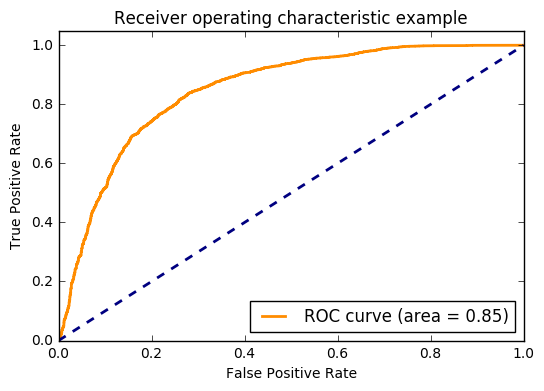

In [3]:
# q3 (b)

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

_ = plt.figure()
lw = 2
_ = plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
_ = plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
_ = plt.xlim([0.0, 1.0])
_ = plt.ylim([0.0, 1.05])
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Receiver operating characteristic example')
_ = plt.legend(loc="lower right")
plt.show()

# Question 4: Support Vector Machines (14 pts)
(a) (6 pts) Apply a linear SVM (kernel = 'linear'), using the scikit-SVM (http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) on the standardized MAGIC Gamma Telescope Data Set. The data have been split into training and test datasets. You can find them in the Q3&Q4 folder. Standardize the columns so they all have mean 0 and unit variance. Specify how you chose the cost penalty ('C' parameter) for the model. Maintain all other parameters as default. 

Hint: see http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier. (GridSearchCV is one way to select parameters for a model. You may use it in your answer, or you may use other ways to solve the problem.)

(b) (4 pts) Repeat (a) but using a Gaussian radial basis kernel (RBF kernel).

(c) (4 pts) Summarize the comparative performance (mean error rates on both the training and test sets) of all the classifiers (Ridge Logistic Regression, SVM with linear kernel, SVM with RBF kernel) that you applied to the MAGIC Gamma Telescope Data Set in this homework in a table. What do you conclude? (be brief)

In [4]:
# q4 (a) (b)

from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10, 100]}
svr = SVC()
clf = GridSearchCV(svr, parameters, cv=10)
clf.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [179]:
print "Run a grid search by changing the C parameter; pick the best mean score as the best model."
clf.grid_scores_

Run a grid search by changing the C parameter; pick the best mean score as the best model.


[mean: 0.78560, std: 0.00396, params: {'kernel': 'linear', 'C': 1},
 mean: 0.86183, std: 0.00778, params: {'kernel': 'rbf', 'C': 1},
 mean: 0.78590, std: 0.00402, params: {'kernel': 'linear', 'C': 10},
 mean: 0.86687, std: 0.00719, params: {'kernel': 'rbf', 'C': 10}]

In [155]:
svr_linear = SVC(kernel='linear',C=10)
svr_linear.fit(X_train, np.ravel(y_train))
score_linear_train = svr_linear.score(X_train, y_train)
score_linear_test = svr_linear.score(X_test, y_test)

svr_rbf = SVC(kernel='rbf',C=100)
svr_rbf.fit(X_train, np.ravel(y_train))
score_rbf_train = svr_rbf.score(X_train, y_train)
score_rbf_test = svr_rbf.score(X_test, y_test)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [167]:
# q4 c

collection = {'Ridge_logR':[1-score_train, 1-score_test], 'svm_linear (C=10)':[1-score_linear_train, 1-score_linear_test], 'svm_rbf (C=100)':[1-score_rbf_train, 1-score_rbf_test]}
df = pd.DataFrame(data=collection, index=['Mean error rate on train_data', 'Mean error rate on test_data'])
print df

print "\nIn summary, the mean error rate (MER) on both ridge logistic regression and svm_linear are similar; while the MER on svm_rbf kernel is way better compared to the others."

                               Ridge_logR  svm_linear (C=10)  svm_rbf (C=100)
Mean error rate on train_data    0.211996           0.213501         0.107992
Mean error rate on test_data     0.203245           0.201675         0.135380

In summary, the mean error rate (MER) on both ridge logistic regression and svm_linear are similar; while the MER on svm_rbf kernel is way better compared to the others.


# Question 5:
(4 pts) What are two properties of Naïve Bayes that make it so suitable for parallel/distributed computation and for analyzing "streaming" data (e.g. each document is processed only once and need not be further stored or revisited).

q5 ans:

1) It assumes independence among attributes $x_i$ when class is given:
$$P(x_1 , x_2 , ... , x_d | C_j ) = \Pi_i P(x_i | C_j )$$
    
Each distribution can be independently estimated as an one-dimensional distribution; thus, the overall Naïve Bayes classifier can be robust enough to ignore serious deficiencies in its underlying naive probability model.

2) Naïve Bayes estimates probabilities directly from data; it only needs single scan of data. The model is simple but useful, which makes Naïve Bayes good for fast changing data due to its low computational cost.

# Question 6:
(5 pts) Receiver operating characteristic (ROC) are created by changing a decision threshold (to decide when to classify an input as belonging to the positive class) in a binary classifier. While some classifiers yield a natural choice for threshold  by comparing with the (estimated value of the) posterior probability of the positive class given the input, other classifiers do not. Select one classifier among decision trees, K nearest neighbors, or support vector machines, and describe how the ROC curve can be drawn for the selected classifier. 

q6 ans:

1) Train your SVM using the training set

2) Evaluate the testing set using the trained SVN model

3) Compare the pre-known labels L of your testing set with the output of the SVM and distinguish further between true positive (TP) and true negative (TN). Also, if the label does not match the output, we distinguish further between false positive (FP) and false negative (FN).

4) Start with TP = TN = FP = FN = 0. Now go through the testing set and increment TP, if the label matches and is positive. Increment TN if your label matches and is negative.

5) At the end, we have a value for TP, TN, FP, and FN (confusion matrix). This is only one single value in the ROC plot.

6) The SVM output is calculated by y = sgn(w^T - b). If we vary the bias b (which is the offset of the hyperplane) and redo step 2 to 5 you get more and more points on the ROC plot